In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import json
from PIL import Image

In [6]:
df = pd.read_csv("rximage_data.csv")

In [7]:
eda_columns = ["shape", "size", "color", "imprint", "score"]
print(df[eda_columns].describe(include="all"))

        shape         size  color imprint        score
count    4392  4392.000000   4392    4371  4392.000000
unique     16          NaN    107    3980          NaN
top     ROUND          NaN  WHITE   b;247          NaN
freq     2032          NaN   1723      12          NaN
mean      NaN    12.034608    NaN     NaN     1.296676
std       NaN     5.011095    NaN     NaN     0.507388
min       NaN     4.000000    NaN     NaN     1.000000
25%       NaN     8.000000    NaN     NaN     1.000000
50%       NaN    11.000000    NaN     NaN     1.000000
75%       NaN    16.000000    NaN     NaN     2.000000
max       NaN    27.000000    NaN     NaN     4.000000


In [9]:
for col in ["shape", "color", "imprint"]:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(10))  # Top 10 most common
    print("-" * 50)

shape: 16 unique values
shape
ROUND        2032
OVAL         1476
CAPSULE       738
TRIANGLE       30
RECTANGLE      27
DIAMOND        16
PENTAGON       15
TEAR           13
HEXAGON        12
SQUARE         12
Name: count, dtype: int64
--------------------------------------------------
color: 107 unique values
color
WHITE          1723
YELLOW          533
PINK            371
ORANGE          358
BLUE            308
BROWN           239
GREEN           191
RED             120
PURPLE           63
BLUE, WHITE      37
Name: count, dtype: int64
--------------------------------------------------
imprint: 3980 unique values
imprint
b;247       12
b;977        9
10           9
5            9
b;978        8
WATSON;P     7
20           6
WC;624       5
40           5
7767;100     4
Name: count, dtype: int64
--------------------------------------------------


In [11]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


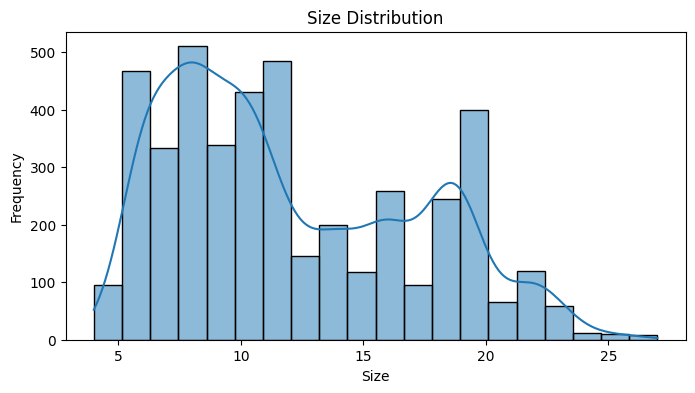

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Size Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["size"].dropna(), bins=20, kde=True)
plt.title("Size Distribution")
plt.xlabel("Size")
plt.ylabel("Frequency")
plt.show()



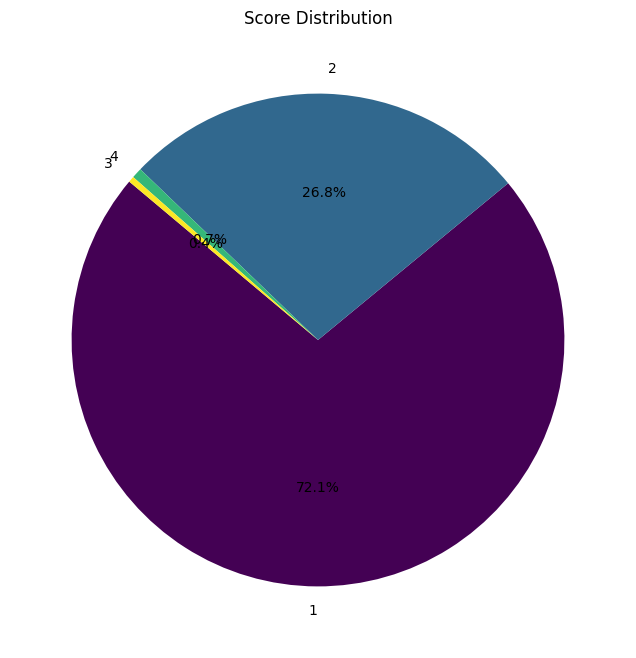

In [18]:
# Score Distribution as a Pie Chart
plt.figure(figsize=(8, 8))
df["score"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", startangle=140, colormap="viridis"
)

plt.ylabel("")  # Remove y-label for cleaner look
plt.title("Score Distribution")
plt.show()

C:\Users\dougl\AppData\Local\Temp\ipykernel_30608\450672885.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_colors.index, x=top_colors.values, palette="viridis")


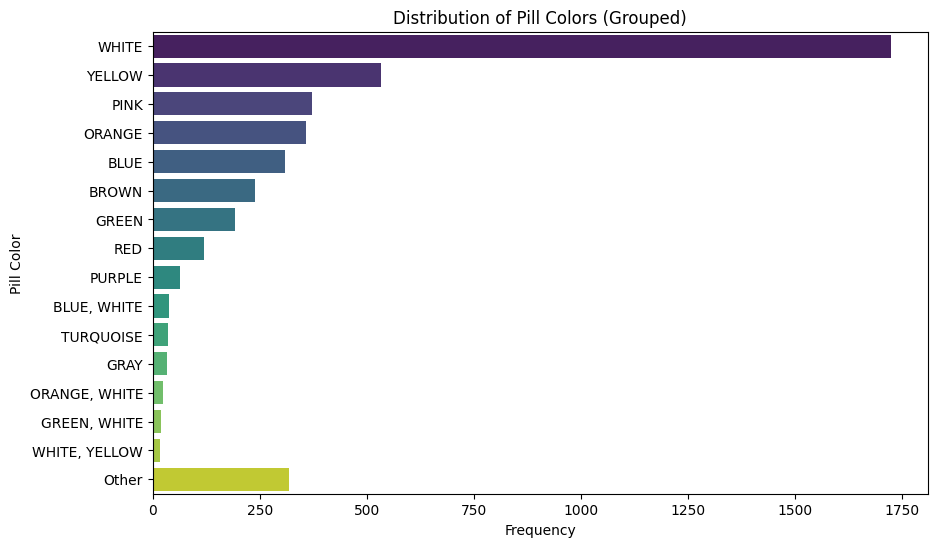

In [16]:
# Count occurrences of each color
color_counts = df['color'].value_counts()

# Set a threshold for displaying individual colors
top_n = 15  # Show top 15 colors, group the rest as "Other"
top_colors = color_counts[:top_n]
other_count = color_counts[top_n:].sum()

# Append "Other" category
top_colors["Other"] = other_count

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_colors.index, x=top_colors.values, palette="viridis")

# Labels and title
plt.xlabel("Frequency")
plt.ylabel("Pill Color")
plt.title("Distribution of Pill Colors (Grouped)")

# Show plot
plt.show()

C:\Users\dougl\AppData\Local\Temp\ipykernel_30608\2474173987.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="color_grouped", y="score", data=df, palette="viridis")


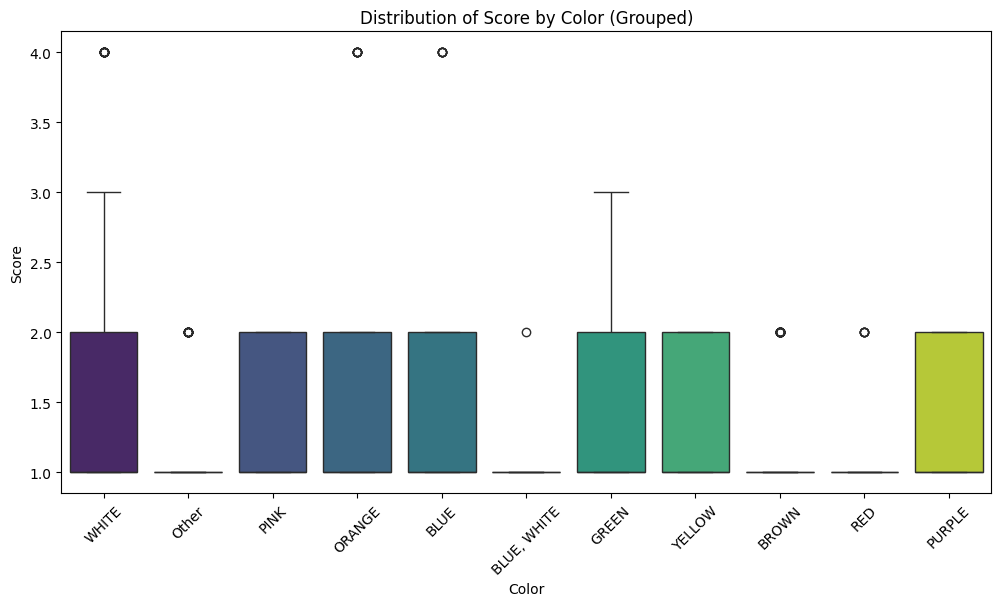

In [23]:
top_n = 10  # Adjust as needed
color_counts = df["color"].value_counts()
top_colors = color_counts.index[:top_n]

df["color_grouped"] = df["color"].apply(lambda x: x if x in top_colors else "Other")

plt.figure(figsize=(12, 6))
sns.boxplot(x="color_grouped", y="score", data=df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of Score by Color (Grouped)")
plt.xlabel("Color")
plt.ylabel("Score")
plt.show()

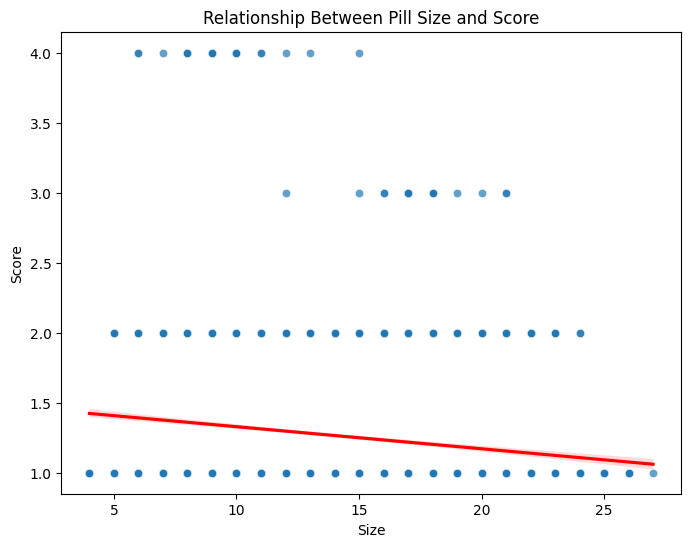

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="size", y="score", data=df, alpha=0.7)
sns.regplot(x="size", y="score", data=df, scatter=False, color="red")  # Trend line
plt.title("Relationship Between Pill Size and Score")
plt.xlabel("Size")
plt.ylabel("Score")
plt.show()

C:\Users\dougl\AppData\Local\Temp\ipykernel_30608\2433016005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["shape"], order=df["shape"].value_counts().index, palette="viridis")


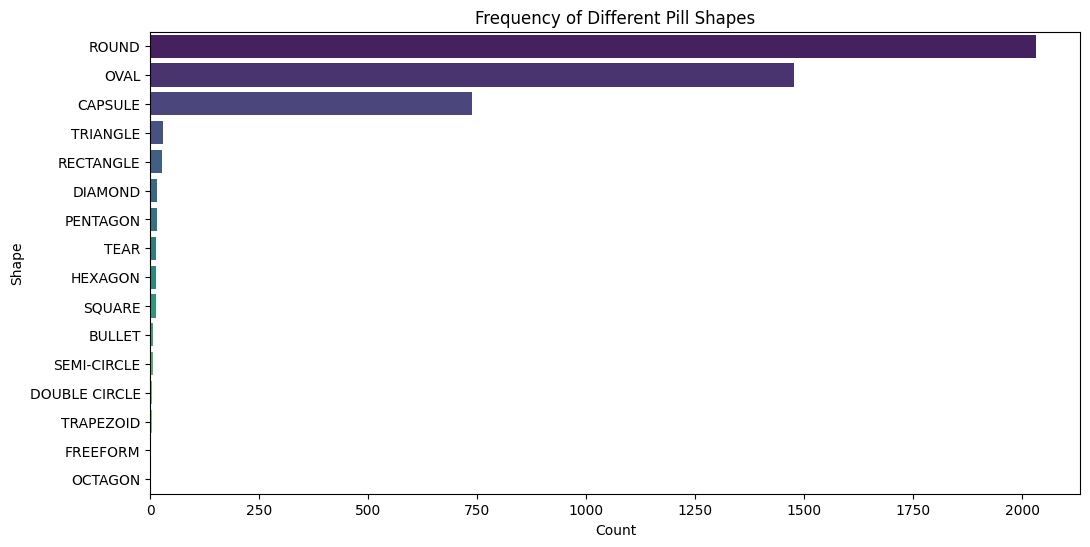

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df["shape"], order=df["shape"].value_counts().index, palette="viridis")
plt.title("Frequency of Different Pill Shapes")
plt.xlabel("Count")
plt.ylabel("Shape")
plt.show()